In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('clean_practo_data.csv')
df.head()

,Speciality,Year_of_experience,Location,City,dp_score,consultation_fee,npv(votes),Degree
0,Dietitian/Nutritionist,4,Koramangala 7 Block,Bangalore,100,600,40,BSc
1,Dietitian/Nutritionist,14,Bandra West,Mumbai,96,2500,222,BSc
2,Dietitian/Nutritionist,16,Kandivali West,Mumbai,99,0,96,BSc
3,Dietitian/Nutritionist,15,Koramangala 3 Block,Bangalore,97,1770,270,BSc
4,Dietitian/Nutritionist,1,Koramangala 5 Block,Bangalore,99,600,121,BSc


In [4]:
df.shape

(5970, 8)

In [5]:
df.duplicated().sum()

9

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5961 entries, 0 to 5969
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Speciality          5961 non-null   object
 1   Year_of_experience  5961 non-null   int64 
 2   Location            5961 non-null   object
 3   City                5961 non-null   object
 4   dp_score            5961 non-null   int64 
 5   consultation_fee    5961 non-null   int64 
 6   npv(votes)          5961 non-null   int64 
 7   Degree              5961 non-null   object
dtypes: int64(4), object(4)
memory usage: 419.1+ KB


In [8]:
for i in df:
    print(i)
    print(df[i].nunique())
    print(df[i].unique())

Speciality
19
['Dietitian/Nutritionist' 'Dentist' 'Physiotherapist' 'Chiropractor'
 'Dermatologist' 'Gynecologist' 'Infertility Specialist' 'Pediatrician'
 'Orthopedist' 'Pulmonologist' 'Cardiologist' 'Rheumatologist'
 'Gastroenterologist' 'Neurologist' 'Bariatric Surgeon' 'Urologist'
 'Neurosurgeon' 'Ophthalmologist' 'Psychiatrist']
Year_of_experience
60
[ 4 14 16 15  1 23 27 22 19 33 17 31 30 25 13 18 24 28 21 11 20  9 12  8
  7 44 34 10  5  6  2 26 29 32  3 36 40 46 43 39 42 50 35 38 51 45 47 41
 37 58 54 48 52 61 49 53 64 57 56 59]
Location
451
['Koramangala 7 Block' 'Bandra West' 'Kandivali West'
 'Koramangala 3 Block' 'Koramangala 5 Block' 'Basaveshwaranagar'
 'Vasant Kunj' 'Malleswaram' 'Malviya Nagar' 'Dwarka' 'Pitampura'
 'HSR Layout' 'Jayanagar 4 Block' 'Sarjapur Road' 'Electronics City'
 'Basavanagudi' 'Banaswadi' 'JP Nagar 6 Phase' 'Mahadevapura' 'Seegehalli'
 'Whitefield' 'Sadashivanagar' 'Rajajinagar' 'Indiranagar' 'JP Nagar'
 'Horamavu' 'Jayanagar 7 Block' 'Kasturi nagar

## Outliers Analysis

In [9]:
for i in df.select_dtypes(include='number'):
    if i!='Consultation fee' :
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        ll=q1-1.5*iqr
        ul=q3+1.5*iqr
        df=df[(df[i]>=ll) & (df[i]<=ul)]

In [10]:
df.shape

(4555, 8)

## Scaling & Encoding:

In [11]:
# Scaling Numerical Columns

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [14]:
df[['Year_of_experience', 'dp_score', 'npv(votes)']] = sc.fit_transform(df[['Year_of_experience', 'dp_score', 'npv(votes)']])

In [15]:
df

,Speciality,Year_of_experience,Location,City,dp_score,consultation_fee,npv(votes),Degree
0,Dietitian/Nutritionist,-1.644963,Koramangala 7 Block,Bangalore,0.882062,600,-0.585295,BSc
2,Dietitian/Nutritionist,-0.178445,Kandivali West,Mumbai,0.640927,0,0.016525,BSc
4,Dietitian/Nutritionist,-2.011592,Koramangala 5 Block,Bangalore,0.640927,600,0.285194,BSc
5,Dietitian/Nutritionist,-0.422865,Basaveshwaranagar,Bangalore,0.158657,850,0.242207,BSc
7,Dietitian/Nutritionist,0.677023,Malleswaram,Bangalore,0.882062,1000,0.123993,BAMS
8,Dietitian/Nutritionist,1.165863,Malviya Nagar,Delhi,-0.082478,500,0.199220,BAMS
9,Dietitian/Nutritionist,0.677023,Dwarka,Delhi,0.640927,1000,2.090655,BAMS
10,Dietitian/Nutritionist,0.554814,Dwarka,Delhi,0.640927,1000,0.747306,BAMS
11,Dietitian/Nutritionist,0.188184,Pitampura,Delhi,-0.082478,500,1.736011,BAMS
12,Dentist,1.899121,HSR Layout,Bangalore,-1.047019,500,-0.359613,BDS


In [16]:
# Encoding Categorical Columns

In [17]:
df.drop(columns=['Location', 'Degree'],inplace=True)

In [18]:
df=pd.get_dummies(df,drop_first=True)

In [19]:
df.head()

,Year_of_experience,dp_score,consultation_fee,npv(votes),Speciality_Cardiologist,Speciality_Chiropractor,Speciality_Dentist,Speciality_Dermatologist,Speciality_Dietitian/Nutritionist,Speciality_Gastroenterologist,...,Speciality_Ophthalmologist,Speciality_Orthopedist,Speciality_Pediatrician,Speciality_Physiotherapist,Speciality_Psychiatrist,Speciality_Pulmonologist,Speciality_Rheumatologist,Speciality_Urologist,City_Delhi,City_Mumbai
0,-1.644963,0.882062,600,-0.585295,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.178445,0.640927,0,0.016525,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,-2.011592,0.640927,600,0.285194,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,-0.422865,0.158657,850,0.242207,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0.677023,0.882062,1000,0.123993,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Machine Learning Models

In [20]:
# splitting the training and testing data

x = df.drop(columns='consultation_fee')
y = df['consultation_fee']

In [21]:
print(f'Shape of Features : {x.shape}')
print(f'Shape of Label : {y.shape}')

Shape of Features : (4555, 23)
Shape of Label : (4555,)


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

In [24]:
print(f'Shape of Training Features : {x_train.shape}')
print(f'Shape of Testing Features : {x_test.shape}')
print(f'Shape of Testing Label : {y_train.shape}')
print(f'Shape of Testing Label : {y_test.shape}')

Shape of Training Features : (3188, 23)
Shape of Testing Features : (1367, 23)
Shape of Testing Label : (3188,)
Shape of Testing Label : (1367,)


## 1. Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [26]:
lr.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([513.2227408 , 938.59011997, 954.52777472, ..., 821.28467374,
       296.39171991, 579.896732  ])

In [28]:
# Evaluating Model Performance

In [29]:
from sklearn import metrics

In [30]:
# Training Score
Training_Score = lr.score(x_train, y_train)
print('Training Score =',Training_Score)

# Testing Score
Testing_Score = lr.score(x_test, y_test)
print('Testing Score =',Testing_Score)

# Mean Absolute Error(MAE)
MAE = metrics.mean_absolute_error(y_test, y_pred_lr)
print('MAE =',MAE)

# Mean Square Error(MSE)
MSE = metrics.mean_squared_error(y_test, y_pred_lr)
print('MSE =',MSE)

# Root mean square error(RSME)
RMSE = np.sqrt(MSE)
print('RMSE =',RMSE)

# R-squared(R2 Score)
R2 = metrics.r2_score(y_test,y_pred_lr)
print('R2_score =',R2) 

Training Score = 0.4996648831373067
Testing Score = 0.521852994436075
MAE = 180.69565462326707
MSE = 58602.964103287915
RMSE = 242.08049095969696
R2_score = 0.521852994436075


## 2. Decision Tree Regressor Model

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
dt = DecisionTreeRegressor()

In [33]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [34]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([ 400.,  900., 1200., ...,  700.,  500.,  200.])

In [35]:
# Evaluating Model Performance

In [36]:
# Training Score
Training_Score = dt.score(x_train, y_train)
print('Training Score =',Training_Score)

# Testing Score
Testing_Score = dt.score(x_test, y_test)
print('Testing Score =',Testing_Score)

# Mean Absolute Error(MAE)
MAE = metrics.mean_absolute_error(y_test, y_pred_dt)
print('MAE =',MAE)

# Mean Square Error(MSE)
MSE = metrics.mean_squared_error(y_test, y_pred_dt)
print('MSE =',MSE)

# Root mean square error(RSME)
RMSE = np.sqrt(MSE)
print('RMSE =',RMSE)

# R-squared(R2 Score)
R2 = metrics.r2_score(y_test,y_pred_dt)
print('R-squared =',R2) 

Training Score = 0.9845447609979953
Testing Score = 0.05507324857955698
MAE = 242.42111680078028
MSE = 115812.72673331707
RMSE = 340.31268964485747
R-squared = 0.05507324857955698


## 3. Decision Tree Regressor Model using Hyperparamater

In [37]:
dtt = DecisionTreeRegressor(max_depth=6, min_impurity_decrease=0.03)

In [38]:
dtt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6, min_impurity_decrease=0.03)

In [39]:
y_pred_dtt = dtt.predict(x_test)
y_pred_dtt

array([ 533.15789474,  772.72151899, 1024.5       , ...,  702.27005871,
        354.38596491,  426.25      ])

In [40]:
# Evaluating Model Performance

In [41]:
# Training Score
Training_Score = dtt.score(x_train, y_train)
print('Training Score =',Training_Score)

# Testing Score
Testing_Score = dtt.score(x_test, y_test)
print('Testing Score =',Testing_Score)

# Mean Absolute Error(MAE)
MAE = metrics.mean_absolute_error(y_test, y_pred_dtt)
print('MAE =',MAE)

# Mean Square Error(MSE)
MSE = metrics.mean_squared_error(y_test, y_pred_dtt)
print('MSE =',MSE)

# Root mean square error(RSME)
RMSE = np.sqrt(MSE)
print('RMSE =',RMSE)

# R-squared(R2 Score)
R2 = metrics.r2_score(y_test,y_pred_dtt)
print('R-squared =',R2) 

Training Score = 0.5300394989188129
Testing Score = 0.4637600159297466
MAE = 193.4434920157816
MSE = 65722.99349685125
RMSE = 256.3649615233159
R-squared = 0.4637600159297466


## 4. Random Forest Regressor Model

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rf = RandomForestRegressor()

In [44]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [45]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([470.        , 945.        , 958.        , ..., 764.34166667,
       423.        , 422.        ])

In [46]:
# Training Score
Training_Score = rf.score(x_train, y_train)
print('Training Score =',Training_Score)

# Testing Score
Testing_Score = rf.score(x_test, y_test)
print('Testing Score =',Testing_Score)

# Mean Absolute Error(MAE)
MAE = metrics.mean_absolute_error(y_test, y_pred_rf)
print('MAE =',MAE)

# Mean Square Error(MSE)
MSE = metrics.mean_squared_error(y_test, y_pred_rf)
print('MSE =',MSE)

# Root mean square error(RSME)
RMSE = np.sqrt(MSE)
print('RMSE =',RMSE)

# R-squared(R2 Score)
R2 = metrics.r2_score(y_test,y_pred_rf)
print('R-squared =',R2) 

Training Score = 0.9123269294717562
Testing Score = 0.47366651091543166
MAE = 191.49051399750374
MSE = 64508.82721894933
RMSE = 253.98587995979094
R-squared = 0.47366651091543166


# 5. Perform PCA on the data.

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca=PCA(n_components=23)
pca.fit(x_train,y_train)

PCA(n_components=23)

In [49]:
pca.explained_variance_

array([1.25535138e+00, 1.09774803e+00, 6.78204387e-01, 2.48521497e-01,
       2.08884392e-01, 1.22595094e-01, 1.14520655e-01, 7.82674877e-02,
       6.77801424e-02, 5.92396155e-02, 5.56389520e-02, 4.55245164e-02,
       3.21786144e-02, 2.59609077e-02, 2.40540706e-02, 2.23851989e-02,
       2.05141239e-02, 1.82685626e-02, 1.58354573e-02, 1.32447886e-02,
       7.55683857e-03, 9.50200848e-04, 5.56287839e-04])

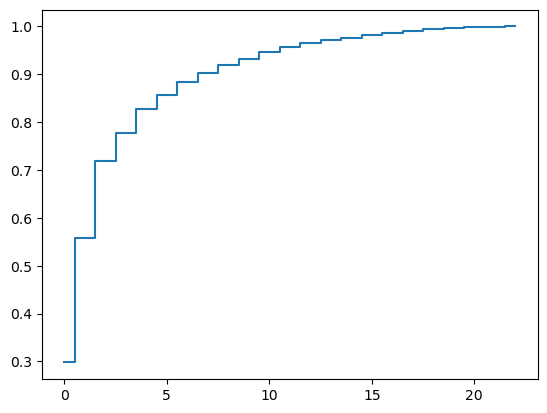

In [50]:
plt.step(x=np.arange(23),y=np.cumsum(pca.explained_variance_ratio_),where='mid')

In [51]:
pca=PCA(n_components=13)
pca.fit(x_train,y_train)

PCA(n_components=13)

In [52]:
pca.explained_variance_

array([1.25535138, 1.09774803, 0.67820439, 0.2485215 , 0.20888439,
       0.12259509, 0.11452065, 0.07826749, 0.06778014, 0.05923962,
       0.05563895, 0.04552452, 0.03217861])

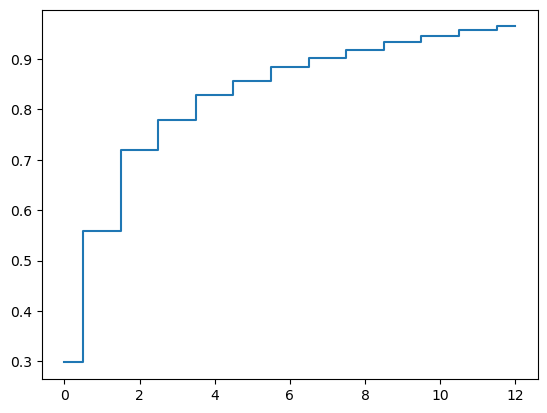

In [53]:
plt.step(x=np.arange(13),y=np.cumsum(pca.explained_variance_ratio_),where='mid')

In [54]:
pca13=PCA(n_components=13)

In [55]:
pca_x=pca13.fit_transform(x)
# pca_x

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(pca_x, y, test_size=0.3, random_state=12)

In [58]:
lr.fit(x_train, y_train)

LinearRegression()

In [59]:
y_pred = lr.predict(x_test)
y_pred

array([ 517.20133014, 1093.32161475,  956.70672741, ...,  831.3645746 ,
        306.6982733 ,  575.54872123])

In [60]:
# R-squared(R2 Score)
R2 = metrics.r2_score(y_test,y_pred)
print('R2_score =',R2) 

R2_score = 0.5101481678864539
